'''
    Programul foloseste urmatoarele librarii:
        -pandas pentru a lucra cu fisiare csv si dataframe
        -numpy pentru a lucra cu numpy array-uri(matrici bidimensionale)
        -os pentru lucurl cu fisiere, verificarea existentei sau stergerea de fisiere
        -matplotlib pentru reprezentari grafice
        -tensorflow si tfts pentru crearea modelului RNN
    
    TFTS (TensorFlow Time Series) este un pachet Python proiectat pentru lucrul cu serii de timp. Acesta ofera un cadru flexibil si puternic pentru rezolvarea sarcinilor legate de analiza seriilor de timp, inclusiv metode clasice si cele mai recente metode de invatare profunda utilizand TensorFlow sau Keras.

    Caracteristici cheie ale TFTS includ:

        - Design flexibil si puternic pentru sarcinile legate de serii de timp.
        - Modele avansate de invatare profunda potrivite pentru industrie, cercetare si competitii.
        - Suport pentru TensorFlow si Keras, doua biblioteci populare de invatare automata si profunda in Python.
'''

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
df = pd.read_csv(r"C:\Users\silviu.musat\Documents\ftir\inputspectre.csv",sep='\t')

In [3]:
df

Filename      E0  \
0             8-GO-BPZ_1.asc  4000.0   
1             8-GO-BPZ_1.asc  3999.0   
2             8-GO-BPZ_1.asc  3998.0   
3             8-GO-BPZ_1.asc  3997.0   
4             8-GO-BPZ_1.asc  3996.0   
...                      ...     ...   
41647  sticla nedepusa_1.asc   534.0   
41648  sticla nedepusa_1.asc   533.0   
41649  sticla nedepusa_1.asc   532.0   
41650  sticla nedepusa_1.asc   531.0   
41651  sticla nedepusa_1.asc   530.0   

                                                interval  E0-Idx     Width  \
0      [109.099009, 109.101216, 109.09833, 109.088991...  3999.0  0.882363   
1      [109.101216, 109.09833, 109.088991, 109.07499,...  3989.0  1.248466   
2      [109.09833, 109.088991, 109.07499, 109.060975,...  3989.0  1.248466   
3      [109.088991, 109.07499, 109.060975, 109.050955...  3989.0  1.248466   
4      [109.07499, 109.060975, 109.050955, 109.045466...  3989.0  1.248466   
...                                                  ...     ...       ...   
41647  [91.630816, 91.574073, 91.508763, 91.440696, 9...   534.0  0.000000   
41648  [91.574073, 91.508763, 91.440696, 91.37162, 91...   533.0  0.000000   
41649  [91.508763, 91.440696, 91.37162, 91.290943, 91...   532.0  0.000000   
41650  [91.440696, 91.37162, 91.290943, 91.199496, 91...   433.0  1.328321   
41651  [91.37162, 91.290943, 91.199496, 91.116521, 91...   433.0  1.997221   

       Prominence  
0        0.002207  
1        0.001912  
2        0.001912  
3        0.001912  
4        0.001912  
...           ...  
41647    0.000000  
41648    0.000000  
41649    0.000000  
41650    0.340286  
41651    0.544515  

[41652 rows x 6 columns]

In [4]:
dfdata=df['interval']


In [5]:
dfdata

0        [109.099009, 109.101216, 109.09833, 109.088991...
1        [109.101216, 109.09833, 109.088991, 109.07499,...
2        [109.09833, 109.088991, 109.07499, 109.060975,...
3        [109.088991, 109.07499, 109.060975, 109.050955...
4        [109.07499, 109.060975, 109.050955, 109.045466...
                               ...                        
41647    [91.630816, 91.574073, 91.508763, 91.440696, 9...
41648    [91.574073, 91.508763, 91.440696, 91.37162, 91...
41649    [91.508763, 91.440696, 91.37162, 91.290943, 91...
41650    [91.440696, 91.37162, 91.290943, 91.199496, 91...
41651    [91.37162, 91.290943, 91.199496, 91.116521, 91...
Name: interval, Length: 41652, dtype: object

In [6]:
interval_array = df['interval'].values

print(interval_array)

['[109.099009, 109.101216, 109.09833, 109.088991, 109.07499, 109.060975, 109.050955, 109.045466, 109.042711, 109.041694, 109.042512, 109.043606, 109.041054, 109.032315, 109.019937, 109.010094, 109.007085, 109.009705, 109.013362, 109.014996, 109.014937, 109.014472, 109.013342, 109.010502, 109.00598, 109.000845, 108.995598, 108.989586, 108.982261, 108.974159, 108.966256, 108.95883, 108.952077, 108.94723, 108.94572, 108.947005, 108.947936, 108.945663, 108.94088, 108.9363, 108.932378, 108.926929, 108.919946, 108.915778, 108.91883, 108.927815, 108.935975, 108.937719, 108.934271, 108.932513, 108.937234, 108.945903, 108.952269, 108.953383, 108.950402, 108.944082, 108.93406, 108.922496, 108.913626, 108.90869, 108.904437, 108.896914, 108.887353, 108.881879, 108.884265, 108.890266, 108.891169, 108.884224, 108.876083, 108.874345, 108.878991, 108.884933, 108.887375, 108.881543, 108.866094, 108.849864, 108.845515, 108.854289, 108.863413, 108.860673, 108.846986, 108.831512, 108.819042, 108.807747, 1

In [7]:
import ast

In [8]:

interval_arrays = df['interval'].apply(lambda x: np.array(ast.literal_eval(x)))

print(interval_arrays)

0        [109.099009, 109.101216, 109.09833, 109.088991...
1        [109.101216, 109.09833, 109.088991, 109.07499,...
2        [109.09833, 109.088991, 109.07499, 109.060975,...
3        [109.088991, 109.07499, 109.060975, 109.050955...
4        [109.07499, 109.060975, 109.050955, 109.045466...
                               ...                        
41647    [91.630816, 91.574073, 91.508763, 91.440696, 9...
41648    [91.574073, 91.508763, 91.440696, 91.37162, 91...
41649    [91.508763, 91.440696, 91.37162, 91.290943, 91...
41650    [91.440696, 91.37162, 91.290943, 91.199496, 91...
41651    [91.37162, 91.290943, 91.199496, 91.116521, 91...
Name: interval, Length: 41652, dtype: object


In [9]:
dfdata_filtered = []
for row in dfdata:
    arr_str = row  # Assuming row is a string representation of the array
    arr = np.fromstring(arr_str[1:-1], sep=',')  # Convert string to numpy array
    if arr.size > 0:  # Skip empty or singleton arrays
        dfdata_filtered.append(arr.reshape( 100))

In [10]:
dfdata_filtered

[array([109.099009, 109.101216, 109.09833 , 109.088991, 109.07499 ,
        109.060975, 109.050955, 109.045466, 109.042711, 109.041694,
        109.042512, 109.043606, 109.041054, 109.032315, 109.019937,
        109.010094, 109.007085, 109.009705, 109.013362, 109.014996,
        109.014937, 109.014472, 109.013342, 109.010502, 109.00598 ,
        109.000845, 108.995598, 108.989586, 108.982261, 108.974159,
        108.966256, 108.95883 , 108.952077, 108.94723 , 108.94572 ,
        108.947005, 108.947936, 108.945663, 108.94088 , 108.9363  ,
        108.932378, 108.926929, 108.919946, 108.915778, 108.91883 ,
        108.927815, 108.935975, 108.937719, 108.934271, 108.932513,
        108.937234, 108.945903, 108.952269, 108.953383, 108.950402,
        108.944082, 108.93406 , 108.922496, 108.913626, 108.90869 ,
        108.904437, 108.896914, 108.887353, 108.881879, 108.884265,
        108.890266, 108.891169, 108.884224, 108.876083, 108.874345,
        108.878991, 108.884933, 108.887375, 108.

In [11]:
pred_list = []

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN

# Define the RNN model
def build_rnn_model():
    model = Sequential([
        Embedding(input_dim=3570, output_dim=128, input_length=100),
        LSTM(units=128, return_sequences=False),
        Dense(units=100)  # Change the activation function as needed
    ])
    return model

# Build the model
model = build_rnn_model()

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          456960    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
Total params: 601,444
Trainable params: 601,444
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Create input data and labels
inputs = dfdata_filtered[:-1]  # All elements except the last one
labels = dfdata_filtered[1:]   # All elements except the first one

# Define a function to generate batches
def generate_batches(inputs, labels, batch_size):
    # Combine inputs and labels into a dataset
    dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
    
    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    return dataset

# Example usage:
batch_size = 1  # Set your desired batch size

# Generate the dataset
dataset = generate_batches(inputs, labels, batch_size)

# Split the dataset into training and validation sets
validation_split = 0.25  # Set the validation split ratio
validation_size = int(len(inputs) * validation_split)

# Create training and validation datasets
train_dataset = dataset.skip(validation_size)
validation_dataset = dataset.take(validation_size)




In [14]:
model.fit(train_dataset,validation_data=validation_dataset, epochs=100)

Epoch 1/100
31239/31239 [==============================] - 337s 11ms/step - loss: 3.0535 - mae: 3.0535 - val_loss: 29.7383 - val_mae: 29.7383
Epoch 2/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.7817 - mae: 0.7817 - val_loss: 11.6027 - val_mae: 11.6027
Epoch 3/100
31239/31239 [==============================] - 327s 10ms/step - loss: 0.4216 - mae: 0.4216 - val_loss: 13.1765 - val_mae: 13.1765
Epoch 4/100
31239/31239 [==============================] - 331s 11ms/step - loss: 0.3984 - mae: 0.3984 - val_loss: 11.0496 - val_mae: 11.0496
Epoch 5/100
31239/31239 [==============================] - 335s 11ms/step - loss: 0.4783 - mae: 0.4783 - val_loss: 7.0346 - val_mae: 7.0346
Epoch 6/100
31239/31239 [==============================] - 336s 11ms/step - loss: 0.5030 - mae: 0.5030 - val_loss: 8.5239 - val_mae: 8.5239
Epoch 7/100
31239/31239 [==============================] - 331s 11ms/step - loss: 0.4689 - mae: 0.4689 - val_loss: 8.6578 - val_mae: 8.6578
Epoch 8/100


31239/31239 [==============================] - 332s 11ms/step - loss: 0.3818 - mae: 0.3818 - val_loss: 2.1657 - val_mae: 2.1657
Epoch 60/100
31239/31239 [==============================] - 329s 11ms/step - loss: 0.3889 - mae: 0.3889 - val_loss: 2.1167 - val_mae: 2.1167
Epoch 61/100
31239/31239 [==============================] - 331s 11ms/step - loss: 0.5307 - mae: 0.5307 - val_loss: 2.9676 - val_mae: 2.9676
Epoch 62/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.4140 - mae: 0.4140 - val_loss: 5.9867 - val_mae: 5.9867
Epoch 63/100
31239/31239 [==============================] - 329s 11ms/step - loss: 1.0926 - mae: 1.0926 - val_loss: 5.1839 - val_mae: 5.1839
Epoch 64/100
31239/31239 [==============================] - 332s 11ms/step - loss: 0.4166 - mae: 0.4166 - val_loss: 2.2245 - val_mae: 2.2245
Epoch 65/100
31239/31239 [==============================] - 334s 11ms/step - loss: 0.3826 - mae: 0.3826 - val_loss: 2.9287 - val_mae: 2.9287
Epoch 66/100
31239/31239 [

In [15]:
model.history.history

{'loss': [3.053466558456421,
  0.781686544418335,
  0.4215923547744751,
  0.39844393730163574,
  0.47826066613197327,
  0.5029991269111633,
  0.4688868224620819,
  0.5887097120285034,
  0.42703765630722046,
  0.5074601769447327,
  0.4295040965080261,
  0.45045205950737,
  0.45169517397880554,
  0.422654390335083,
  0.4221206307411194,
  0.4323578178882599,
  0.4333253800868988,
  0.39145955443382263,
  0.428833931684494,
  0.41221746802330017,
  0.41872933506965637,
  0.42990925908088684,
  0.4126245081424713,
  0.44930019974708557,
  0.44828370213508606,
  0.4503510892391205,
  0.45619362592697144,
  0.39355993270874023,
  0.38400813937187195,
  0.38794517517089844,
  0.39289605617523193,
  0.41709962487220764,
  0.3794342577457428,
  0.3660542070865631,
  0.3614300787448883,
  0.4291055202484131,
  0.4487588107585907,
  0.40694883465766907,
  0.39896366000175476,
  0.3944517970085144,
  0.39755839109420776,
  0.35580676794052124,
  0.40284404158592224,
  0.3802521526813507,
  0.41936

In [16]:
history=model.history.history

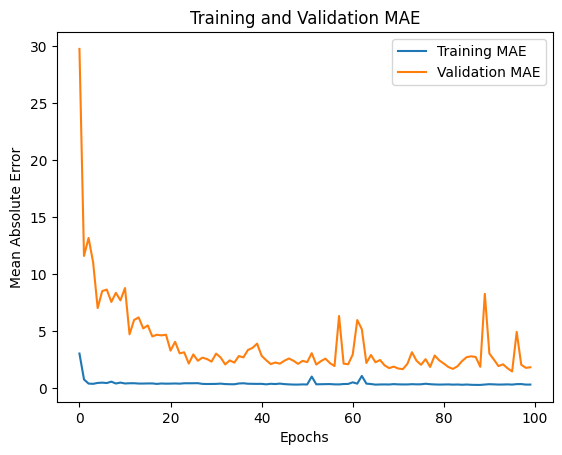

In [27]:
import matplotlib.pyplot as plt
plt.plot(history['loss'], label='Training MAE')
plt.plot(history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [18]:
model.save('model.h5')

In [19]:
model2= tf.keras.models.load_model('model.h5')

In [20]:
inputs

[array([109.099009, 109.101216, 109.09833 , 109.088991, 109.07499 ,
        109.060975, 109.050955, 109.045466, 109.042711, 109.041694,
        109.042512, 109.043606, 109.041054, 109.032315, 109.019937,
        109.010094, 109.007085, 109.009705, 109.013362, 109.014996,
        109.014937, 109.014472, 109.013342, 109.010502, 109.00598 ,
        109.000845, 108.995598, 108.989586, 108.982261, 108.974159,
        108.966256, 108.95883 , 108.952077, 108.94723 , 108.94572 ,
        108.947005, 108.947936, 108.945663, 108.94088 , 108.9363  ,
        108.932378, 108.926929, 108.919946, 108.915778, 108.91883 ,
        108.927815, 108.935975, 108.937719, 108.934271, 108.932513,
        108.937234, 108.945903, 108.952269, 108.953383, 108.950402,
        108.944082, 108.93406 , 108.922496, 108.913626, 108.90869 ,
        108.904437, 108.896914, 108.887353, 108.881879, 108.884265,
        108.890266, 108.891169, 108.884224, 108.876083, 108.874345,
        108.878991, 108.884933, 108.887375, 108.

In [21]:
X_pred=inputs[:1]

In [29]:
pred=model.predict(dataset)


41651/41651 [==============================] - 166s 4ms/step


In [30]:
pred

array([[107.05335 , 107.036385, 106.78201 , ..., 103.07049 , 102.64051 ,
        102.4302  ],
       [107.057175, 107.04046 , 106.78595 , ..., 103.066826, 102.636475,
        102.42604 ],
       [107.06099 , 107.04453 , 106.78989 , ..., 103.06316 , 102.63243 ,
        102.42189 ],
       ...,
       [ 90.119286,  90.07017 ,  89.754814, ...,  73.641624,  73.41386 ,
         73.27455 ],
       [ 90.112335,  90.062454,  89.74649 , ...,  73.64101 ,  73.41307 ,
         73.2739  ],
       [ 90.10826 ,  90.057945,  89.74161 , ...,  73.642334,  73.41429 ,
         73.27518 ]], dtype=float32)

In [31]:
pred = pred.tolist()

In [32]:
pred

[[107.05335235595703,
  107.03638458251953,
  106.78201293945312,
  106.8103256225586,
  106.78358459472656,
  106.5412826538086,
  106.63024139404297,
  106.65376281738281,
  106.67630004882812,
  106.73884582519531,
  106.72380065917969,
  106.96575927734375,
  106.81232452392578,
  106.91866302490234,
  106.98341369628906,
  106.75592041015625,
  107.0350570678711,
  107.00692749023438,
  107.03693389892578,
  107.21927642822266,
  107.22816467285156,
  106.94438171386719,
  106.97073364257812,
  106.95914459228516,
  107.44520568847656,
  107.63426971435547,
  107.58418273925781,
  107.41862487792969,
  107.5540771484375,
  107.82390594482422,
  107.59181213378906,
  107.66563415527344,
  107.8423843383789,
  107.93183135986328,
  107.9995346069336,
  107.9032974243164,
  108.31432342529297,
  108.40252685546875,
  108.3139419555664,
  108.52345275878906,
  108.80229187011719,
  108.6842041015625,
  108.64314270019531,
  108.7402114868164,
  108.81385803222656,
  108.96268463134766

In [33]:
energy_list=df['E0'].tolist()
energy_list = energy_list[:-1]
dfrnn = pd.DataFrame({'E0': energy_list, 'interval': pred})

In [35]:
dfrnn.to_csv('pred.csv', index=False)


In [36]:
import csv

csv_file = 'pred.csv'  # Path to your CSV file
csv_data = []
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        csv_data.append(row)

In [37]:
csv_data

[['E0', 'interval'],
 ['4000.0',
  '[107.05335235595703, 107.03638458251953, 106.78201293945312, 106.8103256225586, 106.78358459472656, 106.5412826538086, 106.63024139404297, 106.65376281738281, 106.67630004882812, 106.73884582519531, 106.72380065917969, 106.96575927734375, 106.81232452392578, 106.91866302490234, 106.98341369628906, 106.75592041015625, 107.0350570678711, 107.00692749023438, 107.03693389892578, 107.21927642822266, 107.22816467285156, 106.94438171386719, 106.97073364257812, 106.95914459228516, 107.44520568847656, 107.63426971435547, 107.58418273925781, 107.41862487792969, 107.5540771484375, 107.82390594482422, 107.59181213378906, 107.66563415527344, 107.8423843383789, 107.93183135986328, 107.9995346069336, 107.9032974243164, 108.31432342529297, 108.40252685546875, 108.3139419555664, 108.52345275878906, 108.80229187011719, 108.6842041015625, 108.64314270019531, 108.7402114868164, 108.81385803222656, 108.96268463134766, 108.8874282836914, 108.8606185913086, 108.87808227539

In [34]:
dfrnn

E0                                           interval
0      4000.0  [107.05335235595703, 107.03638458251953, 106.7...
1      3999.0  [107.05717468261719, 107.04045867919922, 106.7...
2      3998.0  [107.06098937988281, 107.0445327758789, 106.78...
3      3997.0  [107.06500244140625, 107.04881286621094, 106.7...
4      3996.0  [107.06842041015625, 107.0524673461914, 106.79...
...       ...                                                ...
41646   535.0  [90.17157745361328, 90.12885284423828, 89.8167...
41647   534.0  [90.13349914550781, 90.08599853515625, 89.7717...
41648   533.0  [90.1192855834961, 90.0701675415039, 89.754814...
41649   532.0  [90.11233520507812, 90.06245422363281, 89.7464...
41650   531.0  [90.10826110839844, 90.05794525146484, 89.7416...

[41651 rows x 2 columns]

In [23]:
'''import tensorflow as tf
import tfts
from tfts import AutoModel, AutoConfig,KerasTrainer
import numpy as np
import matplotlib.pyplot as plt
config = AutoConfig('rnn').get_config()
print(config)

custom_model_params = {
    "rnn_size": 128,
    "dense_size": 128,
}


predict_length = 100
model1 = AutoModel('rnn', predict_length=predict_length, custom_model_params=custom_model_params)
trainer = KerasTrainer(model)
for i in range(len(dfdata_filtered) - 1):
    x_train = dfdata_filtered[i]
    y_train = dfdata_filtered[i+1]
    x_valid = dfdata_filtered[i]
    y_valid = dfdata_filtered[i+1]
    trainer.train((x_train, y_train), (x_valid, y_valid), n_epochs=10)

    pred = trainer.predict(x_valid)
    trainer.plot(history=x_valid, true=y_valid, pred=pred)
    plt.show()
    pred = pred.numpy()
    pred = pred.tolist()
    pred_list.append(pred) '''

'import tensorflow as tf\nimport tfts\nfrom tfts import AutoModel, AutoConfig,KerasTrainer\nimport numpy as np\nimport matplotlib.pyplot as plt\nconfig = AutoConfig(\'rnn\').get_config()\nprint(config)\n\ncustom_model_params = {\n    "rnn_size": 128,\n    "dense_size": 128,\n}\n\n\npredict_length = 100\nmodel1 = AutoModel(\'rnn\', predict_length=predict_length, custom_model_params=custom_model_params)\ntrainer = KerasTrainer(model)\nfor i in range(len(dfdata_filtered) - 1):\n    x_train = dfdata_filtered[i]\n    y_train = dfdata_filtered[i+1]\n    x_valid = dfdata_filtered[i]\n    y_valid = dfdata_filtered[i+1]\n    trainer.train((x_train, y_train), (x_valid, y_valid), n_epochs=10)\n\n    pred = trainer.predict(x_valid)\n    trainer.plot(history=x_valid, true=y_valid, pred=pred)\n    plt.show()\n    pred = pred.numpy()\n    pred = pred.tolist()\n    pred_list.append(pred) '

In [24]:
'''energy_list=df['E0'].tolist()
energy_list = energy_list[:-1]
dfrnn = pd.DataFrame({'E0': energy_list, 'interval': pred_list})
dfrnn.to_csv('outputrnn.csv',sep='\t', index=False) '''

"energy_list=df['E0'].tolist()\nenergy_list = energy_list[:-1]\ndfrnn = pd.DataFrame({'E0': energy_list, 'interval': pred_list})\ndfrnn.to_csv('outputrnn.csv',sep='\t', index=False) "

In [25]:
'''
Modelul ce foloseste libraria tfts se bazeaza pe:
@misc{tfts2020,
  author = {Longxing Tan},
  title = {Time series prediction},
  year = {2020},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/longxingtan/time-series-prediction}},
}
''' 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 222-223: truncated \uXXXX escape (2438496184.py, line 11)